In [1]:
import matplotlib.pyplot as plt
import pennylane as qml
from pennylane import numpy as np

In [2]:
NUM_QUBITS = 3
dev = qml.device("default.qubit", wires=NUM_QUBITS)
wires = list(range(NUM_QUBITS))

def equal_superposition(wires):
    for j in wires:
        qml.Hadamard(wires=j)

@qml.qnode(dev)
def circuit():
    qml.Snapshot("Initial state") # the argument is the key of the dictionary (see below)
    equal_superposition(wires)
    qml.Snapshot("After applying the Hadamard gates")
    return qml.probs(wires=wires)  # Probability of finding a computational basis state on the wires


results = qml.snapshots(circuit)() # returns a dictionary with the snapshots of a qnode

for k, result in results.items():
    print("\n")
    print(f"{k}: {result}")



Initial state: [1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


After applying the Hadamard gates: [0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j]


execution_results: [0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]


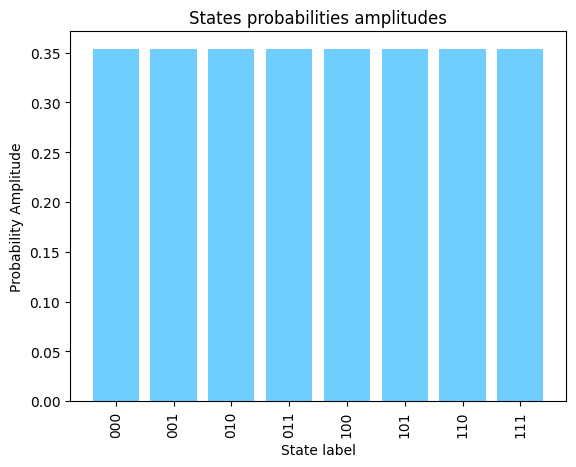

In [3]:
y = np.real(results["After applying the Hadamard gates"]) # retrieve the value of that key in the dictionary results
bit_strings = [f"{x:0{NUM_QUBITS}b}" for x in range(len(y))] # collection of the 2**NUM_QUBITS classical configurations

plt.bar(bit_strings, y, color = "#70CEFF")

plt.xticks(rotation="vertical")
plt.xlabel("State label")
plt.ylabel("Probability Amplitude")
plt.title("States probabilities amplitudes")
plt.show()


Initial state: [1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]

After applying the Hadamard gates: [0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j]

After flipping 101: [ 0.35355339+0.j  0.35355339+0.j  0.35355339+0.j  0.35355339+0.j
  0.35355339+0.j -0.35355339+0.j  0.35355339+0.j  0.35355339+0.j]

execution_results: [ 0.35355339+0.j  0.35355339+0.j  0.35355339+0.j  0.35355339+0.j
  0.35355339+0.j -0.35355339+0.j  0.35355339+0.j  0.35355339+0.j]


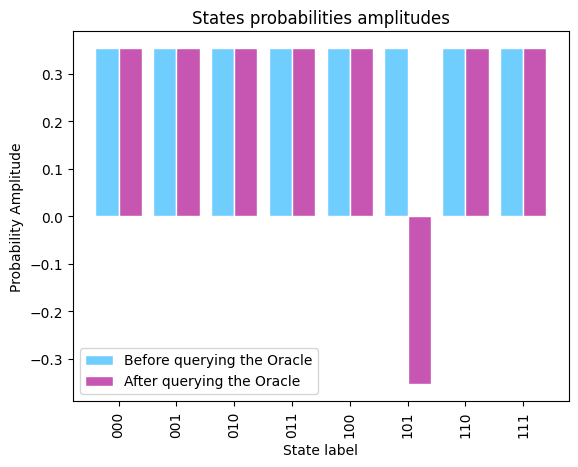

In [4]:
@qml.qnode(dev)
def circuit2():
    qml.Snapshot("Initial state") # the argument is the key of the dictionary (see below)
    equal_superposition(wires)
    qml.Snapshot("After applying the Hadamard gates")
    # Flipping the marked state
    qml.FlipSign([1, 0, 1], wires=wires)
    qml.Snapshot("After flipping 101")
    return qml.state()

results = qml.snapshots(circuit2)()

# again, print the snapshot dictionary
for k, result in results.items():
    print(f"\n{k}: {result}")

y1 = np.real(results["After applying the Hadamard gates"])
y2 = np.real(results["After flipping 101"])

bit_strings = [f"{x:0{NUM_QUBITS}b}" for x in range(len(y1))]

bar_width = 0.4

rect_1 = np.arange(0, len(y1))
rect_2 = [x + bar_width for x in rect_1]

plt.bar(
    rect_1,
    y1,
    width=bar_width,
    edgecolor="white",
    color = "#70CEFF",
    label="Before querying the Oracle",
)
plt.bar(
    rect_2,
    y2,
    width=bar_width,
    edgecolor="white",
    color = "#C756B2",
    label="After querying the Oracle",
)

plt.xticks(rect_1 + 0.2, bit_strings, rotation="vertical")
plt.xlabel("State label")
plt.ylabel("Probability Amplitude")
plt.title("States probabilities amplitudes")
# plt.axhline(y=0.0, color="k", linestyle="-")

plt.legend()
plt.show()


[ 0.35355339+0.j  0.35355339+0.j  0.35355339+0.j  0.35355339+0.j
  0.35355339+0.j  0.35355339+0.j  0.35355339+0.j -0.35355339+0.j]


/opt/anaconda3/envs/quantum/lib/python3.10/site-packages/pennylane/ops/op_math/controlled_ops.py:1046: UserWarning: The control_wires keyword will be removed soon. Use wires = (control_wires, target_wire) instead. See the documentation for more information.
  warnings.warn(
/var/folders/5d/lh100_9d5d7bwtxzmg0zcdmh0000gn/T/ipykernel_24295/66202749.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


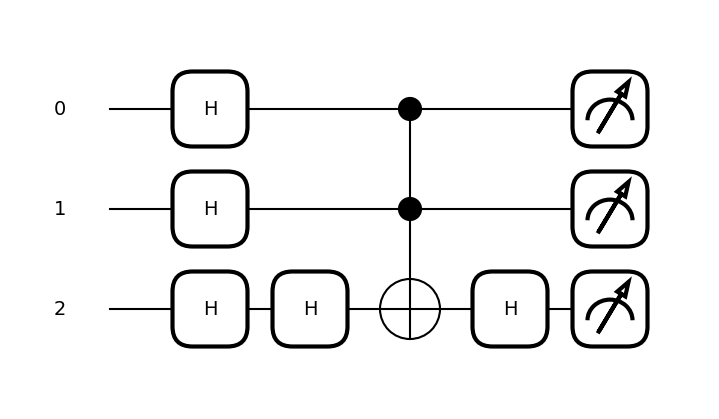

In [5]:
# Part 1.

def oracle():
    qml.Hadamard(wires=[2])
    qml.MultiControlledX(control_wires=[0,1], wires=[2])
    qml.Hadamard(wires=[2])


@qml.qnode(dev)
def circuit3():
    equal_superposition(wires)
    # Flipping the last state 111
    oracle()
    return qml.state()

print(circuit3())

fig, ax = qml.draw_mpl(circuit3)()
fig.show()



[ 0.35355339+0.j  0.35355339+0.j  0.35355339+0.j  0.35355339+0.j
  0.35355339+0.j -0.35355339+0.j  0.35355339+0.j  0.35355339+0.j]


/opt/anaconda3/envs/quantum/lib/python3.10/site-packages/pennylane/ops/op_math/controlled_ops.py:1046: UserWarning: The control_wires keyword will be removed soon. Use wires = (control_wires, target_wire) instead. See the documentation for more information.
  warnings.warn(
/var/folders/5d/lh100_9d5d7bwtxzmg0zcdmh0000gn/T/ipykernel_24295/2252733307.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


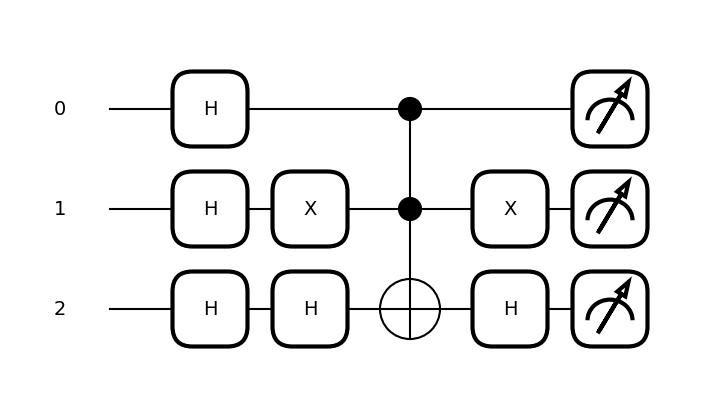

In [6]:
# Part 2.

def oracle_101():
    qml.PauliX(wires=[1])
    qml.Hadamard(wires=[2])
    qml.MultiControlledX(control_wires=[0,1], wires=[2])
    qml.Hadamard(wires=[2])
    qml.PauliX(wires=[1])

@qml.qnode(dev)
def circuit3():
    equal_superposition(wires)
    # Flipping the last state 101
    oracle_101()
    return qml.state()

print(circuit3())

fig, ax = qml.draw_mpl(circuit3)()
fig.show()



In [ ]:
# 01100
NUM_QUBITS = 5
dev = qml.device("default.qubit", wires=NUM_QUBITS)
wires = list(range(NUM_QUBITS))

def equal_superposition(wires):
    for j in wires:
        qml.Hadamard(wires=j)

@qml.qnode(dev)
def circuit():
    qml.Snapshot("Initial state") # the argument is the key of the dictionary (see below)
    equal_superposition(wires)
    qml.Snapshot("After applying the Hadamard gates")
    return qml.probs(wires=wires)  # Probability of finding a computational basis state on the wires


results = qml.snapshots(circuit)() # returns a dictionary with the snapshots of a qnode

for k, result in results.items():
    print("\n")
    print(f"{k}: {result}")

In [16]:
NUM_QUBITS = 5
dev = qml.device("default.qubit", wires=NUM_QUBITS)
wires = list(range(NUM_QUBITS))

def oracle_01100():
    for j in wires:
        qml.Hadamard(wires=j)
    
    qml.PauliX(wires=[0])
    qml.PauliX(wires=[3])
    qml.Hadamard(wires=[1])
    qml.Hadamard(wires=[2])
    qml.PauliX(wires=[4])
    qml.MultiControlledX(control_wires=[0,1,2,3], wires=[4])
    qml.PauliX(wires=[0])
    qml.PauliX(wires=[3])
    qml.Hadamard(wires=[1])
    qml.Hadamard(wires=[2])
    qml.PauliX(wires=[4])
    return qml.state()

@qml.qnode(dev)
def circuit3():
    # Flipping the last state 101
    oracle_01100()
    return qml.state()

print(circuit3())

fig, ax = qml.draw_mpl(circuit3)()
fig.show()

QuantumFunctionError: All measurements must be returned in the order they are measured.

# Exercise 2

In [58]:
NUM_QUBITS = 3
wires = list(range(NUM_QUBITS))
dev = qml.device("default.qubit", wires=NUM_QUBITS)

In [62]:
def diffusion_operator(wires):
    for wire in wires:
        qml.Hadamard(wires=wire)
        qml.PauliZ(wires=wire)
    qml.ctrl(qml.PauliZ, 0)(wires=1)
    for wire in wires:
        qml.Hadamard(wires=wire)

@qml.qnode(dev)
def circuit():
    qml.Snapshot("Initial state")  # the argument is the key of the dictionary (see below)
    for j in wires: qml.Hadamard(wires=j)
    qml.Snapshot("After applying the Hadamard gates")
    # Flipping the marked state
    
    qml.FlipSign([1, 0, 1], wires=wires)
    qml.Snapshot("After applying the oracle")
    
    diffusion_operator(wires)
    
    qml.Snapshot("After applying the diffusion operator")
    return qml.state()


results = qml.snapshots(circuit)()


Initial state: [1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]

After applying the Hadamard gates: [0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j]

After applying the oracle: [ 0.35355339+0.j  0.35355339+0.j  0.35355339+0.j  0.35355339+0.j
  0.35355339+0.j -0.35355339+0.j  0.35355339+0.j  0.35355339+0.j]

After applying the diffusion operator: [2.77555756e-17+0.j 3.53553391e-01+0.j 2.77555756e-17+0.j
 3.53553391e-01+0.j 7.07106781e-01+0.j 3.53553391e-01+0.j
 0.00000000e+00+0.j 3.53553391e-01+0.j]

execution_results: [2.77555756e-17+0.j 3.53553391e-01+0.j 2.77555756e-17+0.j
 3.53553391e-01+0.j 7.07106781e-01+0.j 3.53553391e-01+0.j
 0.00000000e+00+0.j 3.53553391e-01+0.j]


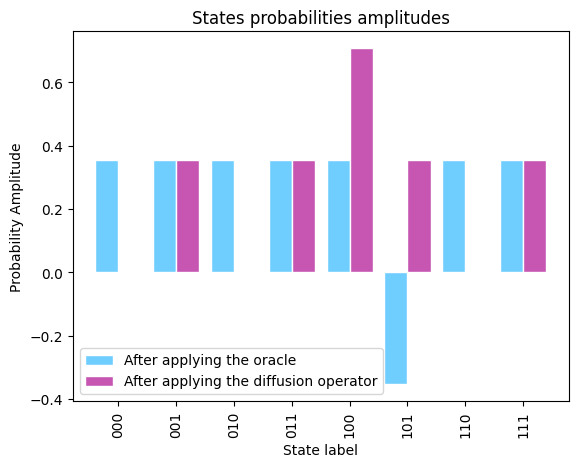

In [63]:
# this code is for the bar plot, as long as you correctly took the snapshots and gave the keys below

# again, print the snapshot dictionary
for k, result in results.items():
    print(f"\n{k}: {result}")

y1 = np.real(results["After applying the oracle"]) # KEY 1
y2 = np.real(results["After applying the diffusion operator"]) # KEY 2

bit_strings = [f"{x:0{NUM_QUBITS}b}" for x in range(len(y1))]

bar_width = 0.4

rect_1 = np.arange(0, len(y1))
rect_2 = [x + bar_width for x in rect_1]

plt.bar(
    rect_1,
    y1,
    width=bar_width,
    edgecolor="white",
    color = "#70CEFF",
    label="After applying the oracle",
)
plt.bar(
    rect_2,
    y2,
    width=bar_width,
    edgecolor="white",
    color = "#C756B2",
    label="After applying the diffusion operator",
)

plt.xticks(rect_1 + 0.2, bit_strings, rotation="vertical")
plt.xlabel("State label")
plt.ylabel("Probability Amplitude")
plt.title("States probabilities amplitudes")
# plt.axhline(y=0.0, color="k", linestyle="-")

plt.legend()
plt.show()


# Exercise 3

In [68]:
N = 2

def diffusion_operator(wires):
    for wire in wires:
        qml.Hadamard(wires=wire)
        qml.PauliZ(wires=wire)
    qml.ctrl(qml.PauliZ, 0)(wires=1)
    for wire in wires:
        qml.Hadamard(wires=wire)

@qml.qnode(dev)
def circuit():
    for i in range(N):
        for j in wires: qml.Hadamard(wires=j)
        
        qml.FlipSign([1, 0, 1], wires=wires)
    
        diffusion_operator(wires)
    
    return qml.state()


results = qml.snapshots(circuit)()
for k, result in results.items():
        print(f"\n{k}: {result}")


execution_results: [ 2.50000000e-01+0.j -5.00000000e-01+0.j -2.50000000e-01+0.j
  5.55111512e-17+0.j -2.50000000e-01+0.j  5.00000000e-01+0.j
  2.50000000e-01+0.j  5.00000000e-01+0.j]


In [66]:
N = 8
for i in range(N):
    results = qml.snapshots(circuit)()
    print(results.item())
    for k, result in results.items():
        print(f"\n{k}: {result}")

AttributeError: 'dict' object has no attribute 'item'